# TITANIC DATASET

## Project Overview:
The dataset contains passenger details of Titanic ship including name, age, passenger Id and various other informations.
Performing data cleaning and exploratory data analysis (EDA) on the dataset and exploring the relationships between 
variables and identify patterns and trends in the data.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\\PRODIGY INFOTECH\\Dataset_02\\train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# finding out relevant informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('Number of columns:',df.shape[1])
print('Number of rows:',df.shape[0])

Number of columns: 12
Number of rows: 891


In [6]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# checking for duplicated values
df.duplicated().sum()

0

Since there is no duplicate value in the dataset, so dont need to correct any value

In [8]:
# Details regarding Number of  passenger 
print('Total number of passengers in the ship:',df['Sex'].value_counts().sum())
print('Total number of male passenger is',df['Sex'].value_counts()[0])
print('Total number of female passenger is',df['Sex'].value_counts()[1])

Total number of passengers in the ship: 891
Total number of male passenger is 577
Total number of female passenger is 314


In [9]:
temp_pclass = df['Pclass'].unique()
for i in temp_pclass:
    temp_p = df[df['Pclass']==i]
    percentage_of_pclass=(temp_p['Survived'].sum()/len(temp_p))*100

    print(f"Percentage of passengers in the class {i} that Survived : {percentage_of_pclass :.2f}%")

Percentage of passengers in the class 3 that Survived : 24.24%
Percentage of passengers in the class 1 that Survived : 62.96%
Percentage of passengers in the class 2 that Survived : 47.28%


## Data Cleaning

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 687 null values in the Cabin column, as a result the cabin column will have no impact on our dataset, so we can delete the column
- The age column contains 177 null values which is 19.86% of the data. So on dropping the column, we will lose almost 80% of the data. Instead we can fill the age column with the previos age value.

In [11]:
# dropping the Cabin column
df = df.drop('Cabin',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df['Age'].fillna(method='ffill',inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### DATA VISUALIZATION

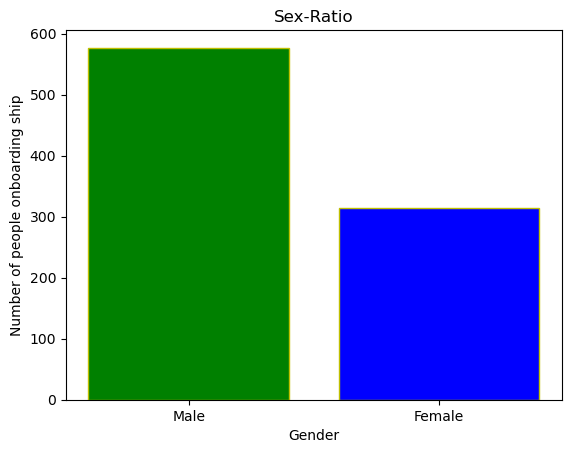

In [13]:
# ratio of male and female
gender = ['Male','Female']
index = [df['Sex'].value_counts()[0],df['Sex'].value_counts()[1]]
plt.bar(gender,index,color= ['g','b'],edgecolor='y')
plt.xlabel('Gender')
plt.ylabel('Number of people onboarding ship')
plt.title('Sex-Ratio')
plt.show()

In [14]:
alive = len(df[df['Survived'] == 1])
dead = len(df[df['Survived'] == 0])
print('The number of passengers survived:',alive)
print('The number of passengers died:',dead)

The number of passengers survived: 342
The number of passengers died: 549


In [15]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

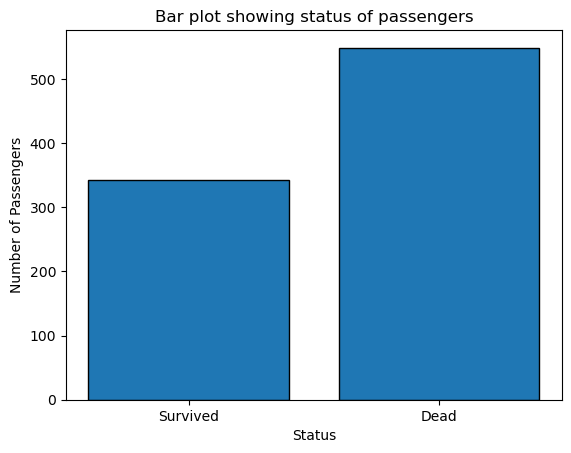

In [16]:
status = ['Survived','Dead']
index = [alive,dead]
plt.bar(status,index,edgecolor='k')
plt.xlabel('Status')
plt.ylabel('Number of Passengers')
plt.title('Bar plot showing status of passengers')
plt.show()

Text(0.5, 1.0, 'Number of passengers according\nto ticket class who did not survive')

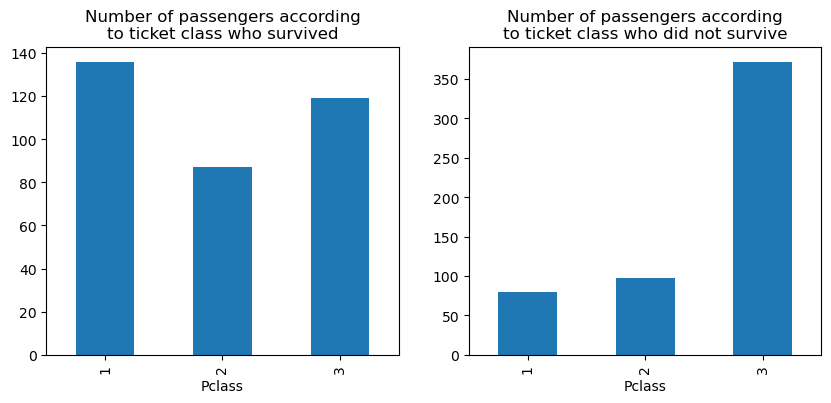

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df.loc[df['Survived'] == 1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Number of passengers according\nto ticket class who survived')

plt.subplot(1,2,2)
df.loc[df['Survived'] == 0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Number of passengers according\nto ticket class who did not survive')

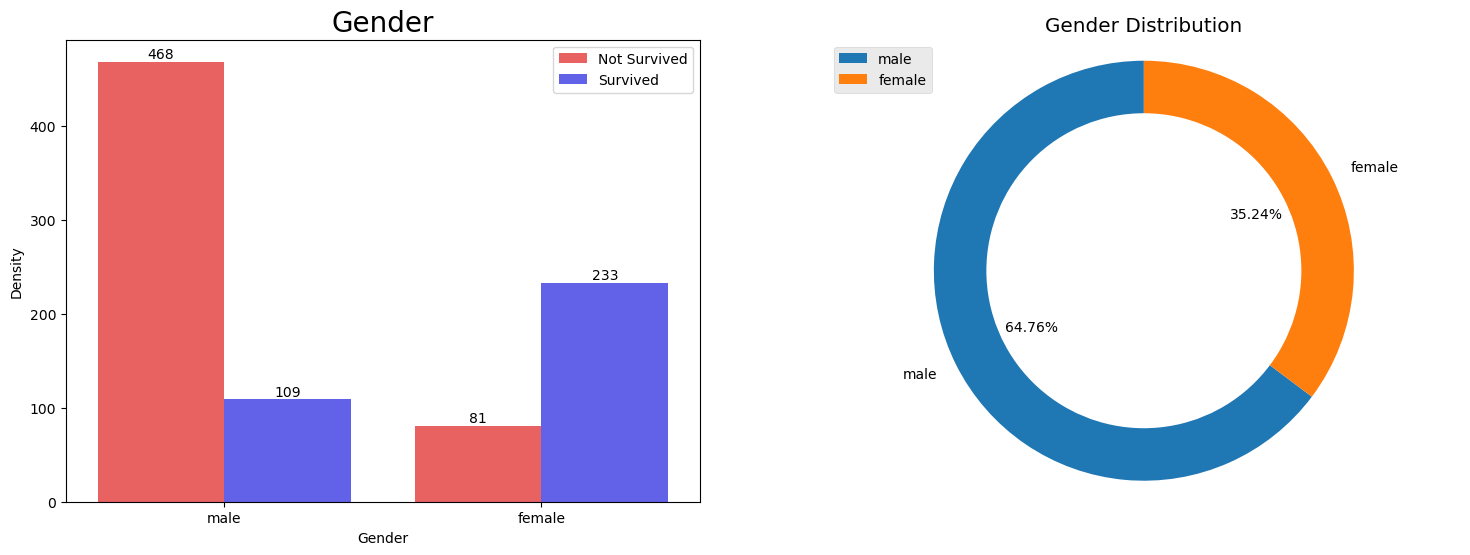

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
color_gen={1: "Blue",0 : "red"}
countP_gender=sns.countplot(x='Sex',hue="Survived",data=df,palette=color_gen,alpha=0.7)
for temp_survival in countP_gender.containers:
    countP_gender.bar_label(temp_survival)
plt.xlabel("Gender")
plt.ylabel("Density")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

plt.subplot(1,2,2)
gender_counts = df['Sex'].value_counts()
labels = gender_counts.index
plt.style.use('ggplot')
plt.pie(gender_counts, labels=labels, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='upper left')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Gender Distribution')
plt.show()

* The total number of passengers is 418, with 63.64% being male and 36.36% being female.
* **all males did not survive**
* **all females survived**.

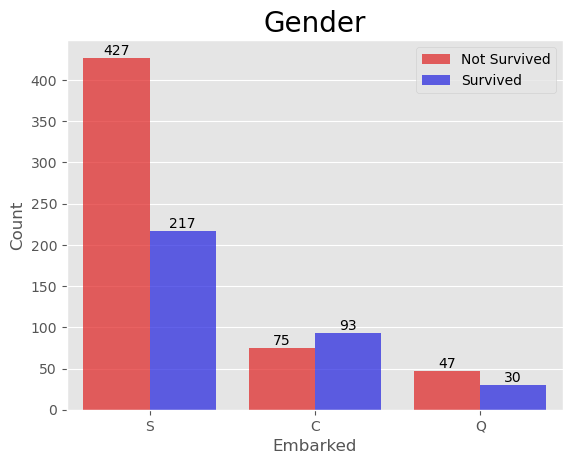

In [20]:
color_em={1: "Blue",0 : "red"}
countP_em=sns.countplot(x='Embarked',hue="Survived",data=df,palette=color_em,alpha=0.7)
for temp_survival in countP_em.containers:
    countP_em.bar_label(temp_survival)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])
plt.show()

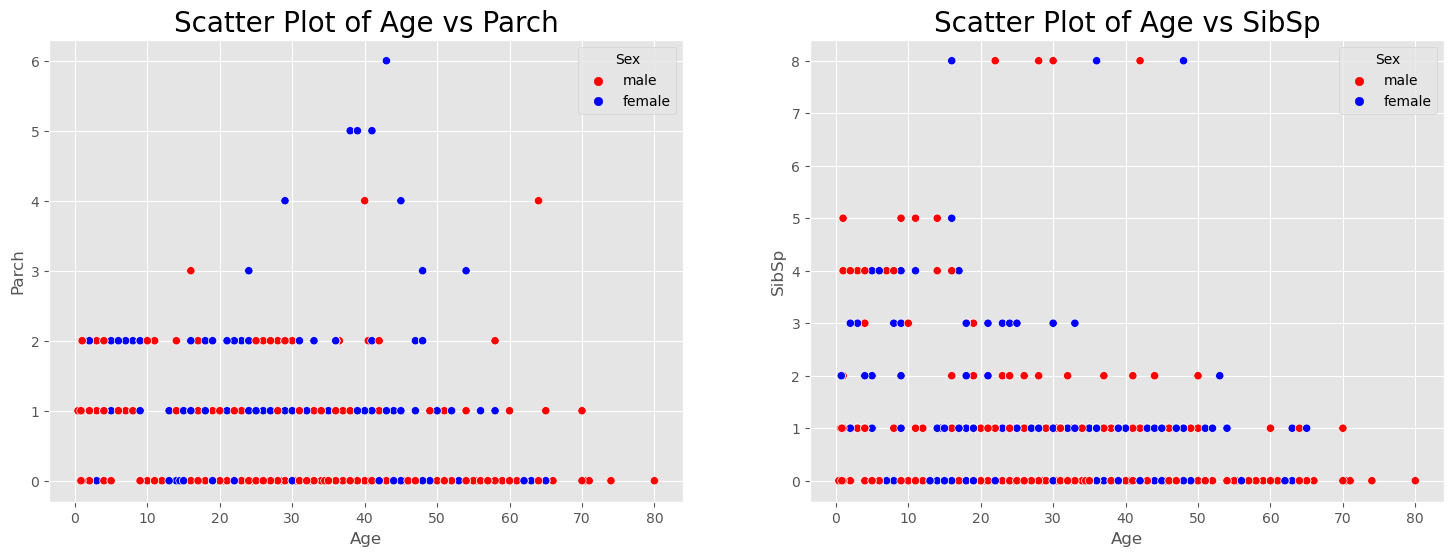

In [21]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Parch'], hue=df['Sex'], palette={'male': 'red', 'female': 'blue'})
plt.title('Scatter Plot of Age vs Parch', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Parch')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Age'], y=df['SibSp'], hue=df['Sex'], palette={'male': 'Red', 'female': 'blue'})
plt.title('Scatter Plot of Age vs SibSp', fontsize=20)
plt.xlabel('Age')
plt.ylabel('SibSp')

plt.show()

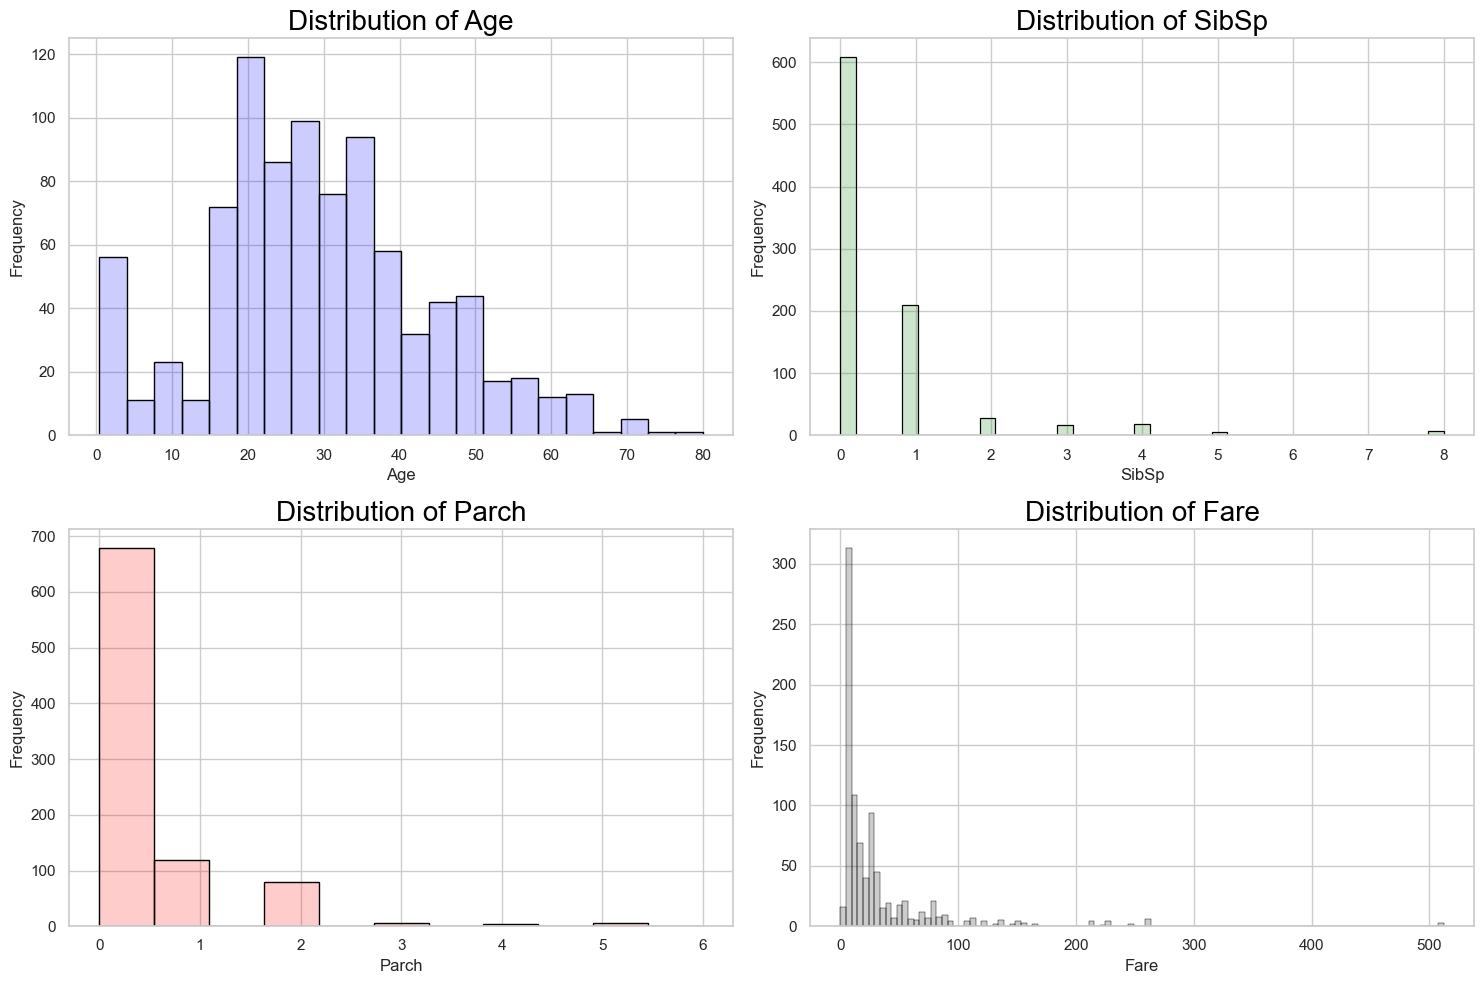

In [22]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=False, color='blue', edgecolor='black',alpha=0.2)
plt.title('Distribution of Age', color='black', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['SibSp'], kde=False, color='green', edgecolor='black',alpha=0.2)
plt.title('Distribution of SibSp', color='black', fontsize=20)
plt.xlabel('SibSp')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['Parch'], kde=False, color='red', edgecolor='black',alpha=0.2)
plt.title('Distribution of Parch', color='black', fontsize=20)
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['Fare'], kde=False, color='black', edgecolor='black',alpha=0.2)
plt.title('Distribution of Fare', color='black', fontsize=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- The majority of the passengers were aged 20-30, with a significant number aged 30-50.
- Around 100 passengers had one sibling.and majority of passengers had no siblings. 
- the majority had no spouse, with a small number having a spouse. 
- Most of the tickets brought of the cost of around 0-50. 

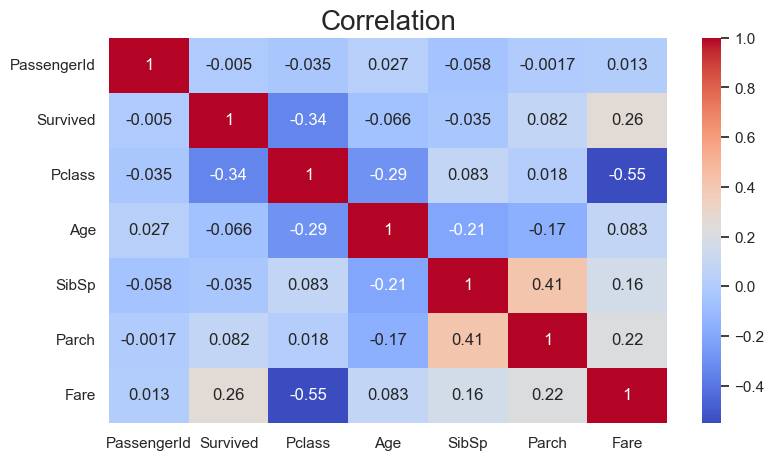

In [32]:
plt.figure(figsize=(9,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation",fontsize=20)
plt.show()     

- This heatmap chart highlights that there is a high negative correlation between Pclass and both Age and Fare in the Titanic dataset. 
- Additionally, Age versus Fare and SibSp versus Parch exhibit a moderate correlation of 0.32. 
- Moreover, there is a moderate positive correlation of 0.19 between Survived and Fare.

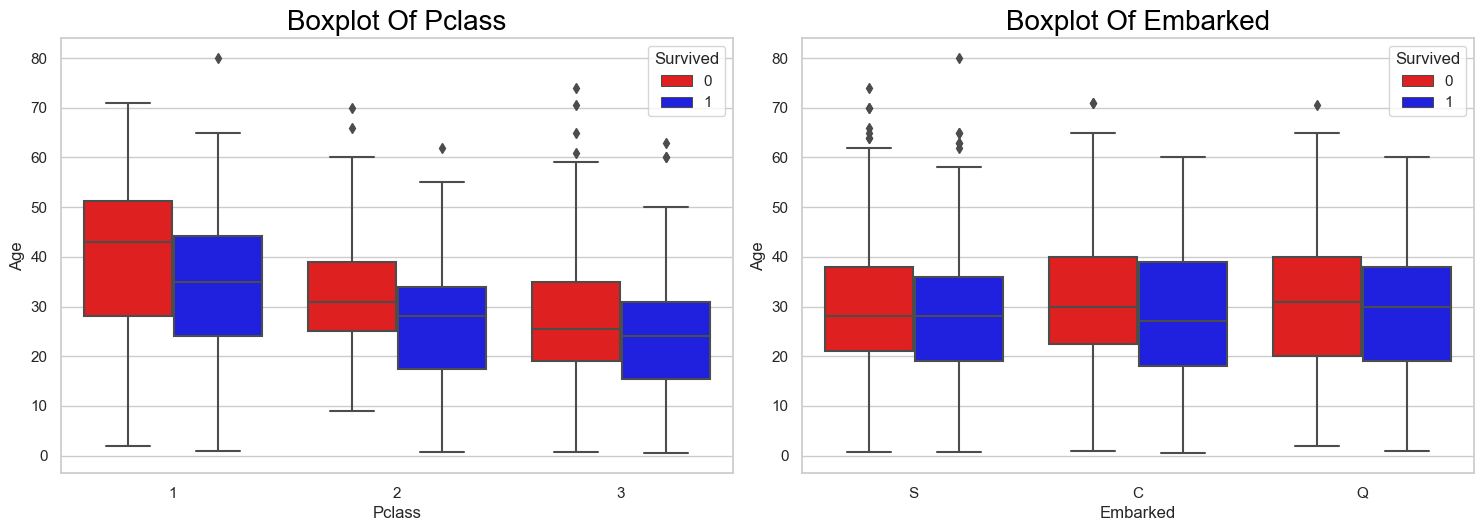

In [34]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

# Lighter shades for the colors
light_palette = sns.light_palette("seagreen", as_cmap=True)

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived", palette={0: 'red', 1: 'blue'})
plt.title('Boxplot Of Pclass', color='black', fontsize=20)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="Embarked", y="Age", hue="Survived", palette={0: 'red', 1: 'blue'})
plt.title('Boxplot Of Embarked', color='black', fontsize=20)

plt.tight_layout()
plt.show()

* **Boxplot of Pclass:**
In the 2nd class survival graph, three outliers are observed. In the 3rd class non-survival graph, three outliers are evident.

* **Boxplot of Embarked:**
In Queenstown (Q) of the non-survival graph, two outliers are present. In Southampton (S), there are numerous outliers in both the survived and non-survived categories.